# <div class="alert alert-info">Natural Language Processing: Disaster Tweet Classification</div>

**Installing the required libraries**

In [1]:
import pandas as pd
import spacy
!pip install yake
import yake

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=77912 sha256=6c6cb813e144dc78e933ecacc189eb50ca7abbf809af0778d3c6a12d395d0828
  Stored in directory: /root/.cache/pip/wheels/f1/c7/3c/4c83132de76359e3a429fd09c08995945ca96c5290a41651d3
Successfully built jellyfish


In [2]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import re
import numpy as np

In [4]:
train_path = '/content/drive/MyDrive/NLP Tweets/train_tweets.csv'
test_path = '/content/drive/MyDrive/NLP Tweets/test_tweets.csv'

In [5]:
df_train = pd.read_csv(train_path)
df_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
y = df_train['target']

In [7]:
df_train[df_train['text'].isnull()]==True  # this code shows that there are no empty texts

,id,keyword,location,text,target


**<div class="alert alert-success">Cleaning the Text by removing punctuations and special characters.</div>**

In [8]:
def clean_the_text(column):
  new_text = []
  for tweet in column:
    tweet = re.sub(r'https?:\/\/.\S+', "", tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = str(tweet).replace('[','').replace(']','').replace(';','').replace(':','')
    new_text.append(tweet)
  return new_text

In [9]:
new_text = clean_the_text(df_train['text'])
new_text[:10]

['Our Deeds are the Reason of this earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask Canada',
 'All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected',
 '13000 people receive wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school ',
 'RockyFire Update  California Hwy 20 closed in both directions due to Lake County fire  CAfire wildfires',
 'flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas',
 'Im on top of the hill and I can see a fire in the woods',
 'Theres an emergency evacuation happening now in the building across the street',
 'Im afraid that the tornado is coming to our area']

In [10]:
df_train['text'] = new_text
df_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary TheTawniest The out of control wil...,1
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1
7612,10873,NaN,NaN,The Latest More Homes Razed by Northern Califo...,1


In [11]:
df_train['target'].unique()

array([1, 0])

In [12]:
sample_tweet = df_train['text'][0]
sample_tweet

'Our Deeds are the Reason of this earthquake May ALLAH Forgive us all'

yake = Yet Another KeyWord Extractor 

In [13]:
kw = yake.KeywordExtractor(lan='en',n=1)
keywords = kw.extract_keywords(sample_tweet)
best_keyword = keywords[-1][0]
best_keyword

'earthquake'

**<div class="alert alert-success">Making a function to extract keywords from text and replacing nan values from keyword column</div>**

In [14]:
df_nan = df_train[df_train['keyword'].isnull()==True]
df_nan

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,aria_ahrary TheTawniest The out of control wil...,1
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1


In [15]:
def keyword_extractor(column):
  keys = []
  index = []
  for i in column:
    kw = yake.KeywordExtractor(lan='en', n=1)
    keywords = kw.extract_keywords(i)
    if len(keywords) == 0:
      index.append(i)
      continue
    else:
      best = keywords[-1][0]
      keys.append(best)
  return keys, index

In [16]:
keys_from_text, index = keyword_extractor(df_nan['text'])
index

[]

In [17]:
# df_train = df_train[df_train['text'] != 'That usually NEVER happens']
# df_train.head()

In [18]:
len(keys_from_text), len(df_nan['keyword'])

(61, 61)

In [19]:
df_nan['keyword'] = keys_from_text
df_nan.head()

<ipython-input-19-47880d83faec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan['keyword'] = keys_from_text


,id,keyword,location,text,target
0,1,earthquake,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,fire,NaN,Forest fire near La Ronge Sask Canada,1
2,5,orders,NaN,All residents asked to shelter in place are be...,1
3,6,orders,NaN,13000 people receive wildfires evacuation orde...,1
4,7,pours,NaN,Just got sent this photo from Ruby Alaska as s...,1


**<div class="alert alert-success">Making a basic Deep Learning Model with Bidirectional LSTM</div>**

In [20]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [21]:
text = list(df_train['text'])
text[:5]

['Our Deeds are the Reason of this earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask Canada',
 'All residents asked to shelter in place are being notified by officers No other evacuation or shelter in place orders are expected',
 '13000 people receive wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby Alaska as smoke from wildfires pours into a school ']

In [22]:
target = list(df_train['target'])
target[:5]

[1, 1, 1, 1, 1]

**Vectorizing the Text for feeding into LSTM model**

In [23]:
MAX_FEATURES = 20000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=50,
                               output_mode='int')
vectorizer.adapt(text)
vec_text = vectorizer(text)

In [24]:
vec_text

<tf.Tensor: shape=(7613, 50), dtype=int64, numpy=
array([[ 109, 6168,   22, ...,    0,    0,    0],
       [ 179,   42,  222, ...,    0,    0,    0],
       [  40, 1738, 1684, ...,    0,    0,    0],
       ...,
       [3119, 4493, 4634, ...,    0,    0,    0],
       [  76, 1096,   38, ...,    0,    0,    0],
       [   2,  199,   52, ...,    0,    0,    0]])>

In [25]:
dataset = tf.data.Dataset.from_tensor_slices((vec_text, target))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

**Slicing the Dataset into train, validation and test sets.**

In [26]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

**Sequential Model - 1 Embedding Layer used for creating 32 dimensional Embedding and 1 Bidirectional LSTM layer with activation tanh**

In [27]:
model = Sequential([
    Embedding(MAX_FEATURES+1, 32),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640032    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 706,337
Trainable params: 706,337
Non-trainable params: 0
__________________________________________________

In [28]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
333/333 [==============================] - 24s 59ms/step - loss: 0.5288 - accuracy: 0.7286 - val_loss: 0.3109 - val_accuracy: 0.8789
Epoch 2/5
333/333 [==============================] - 10s 30ms/step - loss: 0.3398 - accuracy: 0.8568 - val_loss: 0.2177 - val_accuracy: 0.9263
Epoch 3/5
333/333 [==============================] - 10s 30ms/step - loss: 0.2299 - accuracy: 0.9159 - val_loss: 0.1352 - val_accuracy: 0.9480
Epoch 4/5
333/333 [==============================] - 10s 31ms/step - loss: 0.1693 - accuracy: 0.9379 - val_loss: 0.0909 - val_accuracy: 0.9704
Epoch 5/5
333/333 [==============================] - 10s 29ms/step - loss: 0.1205 - accuracy: 0.9570 - val_loss: 0.0769 - val_accuracy: 0.9743


<Figure size 576x360 with 0 Axes>

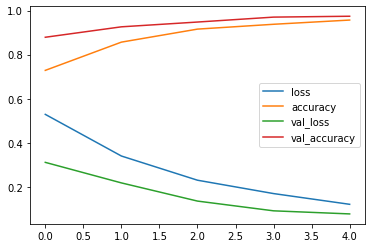

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

**Prepearing the test data and making predictions.**

In [30]:
df_test = pd.read_csv(test_path)
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [31]:
df_test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [32]:
test_text = clean_the_text(df_test['text'])
test_text[:5]

['Just happened a terrible car crash',
 'Heard about earthquake is different cities stay safe everyone',
 'there is a forest fire at spot pond geese are fleeing across the street I cannot save them all',
 'Apocalypse lighting Spokane wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [33]:
vectorizer.adapt(test_text)
vec_test = vectorizer(test_text)

In [34]:
vec_test

<tf.Tensor: shape=(3263, 50), dtype=int64, numpy=
array([[  30,  624,    3, ...,    0,    0,    0],
       [ 271,   52,  273, ...,    0,    0,    0],
       [  72,    9,    3, ...,    0,    0,    0],
       ...,
       [ 689,  288,  699, ...,    0,    0,    0],
       [3132,  683,  433, ...,    0,    0,    0],
       [3635,   54, 3832, ...,    0,    0,    0]])>

In [35]:
test_pred = model.predict(vec_test)
test_pred

102/102 [==============================] - 1s 7ms/step


array([[0.31573826],
       [0.09134576],
       [0.99847144],
       ...,
       [0.18192713],
       [0.7523892 ],
       [0.0282895 ]], dtype=float32)

In [36]:
preds = []
for i in test_pred:
  if i>0.5:
    preds.append(1)
  else:
    preds.append(0)

In [37]:
ids = list(df_test['id'])
sub = pd.DataFrame(list(zip(ids, preds)),
               columns =['id', 'target'])

In [38]:
sub.set_index('id')
sub.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [39]:
sub.to_csv('submission_amogh.csv',index=False)

**<div class="alert alert-success">Now adding another vector layer from keyword column and feeding the new vectors to the LSTM model.</div>**

In [40]:
df_train.update(df_nan)
df_train.head()

,id,keyword,location,text,target
0,1.0,earthquake,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4.0,fire,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5.0,orders,NaN,All residents asked to shelter in place are be...,1.0
3,6.0,orders,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7.0,pours,NaN,Just got sent this photo from Ruby Alaska as s...,1.0


In [41]:
df_train.drop(['location'], axis=1)

,id,keyword,text,target
0,1.0,earthquake,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4.0,fire,Forest fire near La Ronge Sask Canada,1.0
2,5.0,orders,All residents asked to shelter in place are be...,1.0
3,6.0,orders,13000 people receive wildfires evacuation orde...,1.0
4,7.0,pours,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...
7608,10869.0,nearby,Two giant cranes holding a bridge collapse int...,1.0
7609,10870.0,state,aria_ahrary TheTawniest The out of control wil...,1.0
7610,10871.0,Volcano,M194 0104 UTC5km S of Volcano Hawaii,1.0
7611,10872.0,threatening,Police investigating after an ebike collided w...,1.0


In [44]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [45]:
vectorizer.adapt(list(df_train['keyword']))
keyword_to_vec = vectorizer(list(df_train['keyword']))
keyword_to_vec = keyword_to_vec[:, 0]
keyword_to_vec = np.reshape(keyword_to_vec, (1,keyword_to_vec.size))
keyword_to_vec

<tf.Tensor: shape=(1, 7613), dtype=int64, numpy=array([[  7,  14, 223, ..., 210, 231, 271]])>

In [46]:
res = np.concatenate((keyword_to_vec.T, vec_text),axis=1)
res

array([[   7,  109, 6168, ...,    0,    0,    0],
       [  14,  179,   42, ...,    0,    0,    0],
       [ 223,   40, 1738, ...,    0,    0,    0],
       ...,
       [ 210, 3119, 4493, ...,    0,    0,    0],
       [ 231,   76, 1096, ...,    0,    0,    0],
       [ 271,    2,  199, ...,    0,    0,    0]])

In [47]:
model1 = Sequential([
    Embedding(MAX_FEATURES+1, 32),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640032    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 256)               16640     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 706,337
Trainable params: 706,337
Non-trainable params: 0
________________________________________________

In [48]:
history1 = model1.fit(train, epochs=10, validation_data=val)

Epoch 1/10
333/333 [==============================] - 14s 32ms/step - loss: 0.5193 - accuracy: 0.7436 - val_loss: 0.3241 - val_accuracy: 0.8770
Epoch 2/10
333/333 [==============================] - 10s 30ms/step - loss: 0.3406 - accuracy: 0.8611 - val_loss: 0.2437 - val_accuracy: 0.9105
Epoch 3/10
333/333 [==============================] - 10s 31ms/step - loss: 0.2230 - accuracy: 0.9155 - val_loss: 0.1241 - val_accuracy: 0.9586
Epoch 4/10
333/333 [==============================] - 12s 35ms/step - loss: 0.1547 - accuracy: 0.9424 - val_loss: 0.0955 - val_accuracy: 0.9664
Epoch 5/10
333/333 [==============================] - 9s 28ms/step - loss: 0.1142 - accuracy: 0.9643 - val_loss: 0.0749 - val_accuracy: 0.9730
Epoch 6/10
333/333 [==============================] - 10s 32ms/step - loss: 0.0730 - accuracy: 0.9722 - val_loss: 0.0454 - val_accuracy: 0.9783
Epoch 7/10
333/333 [==============================] - 11s 32ms/step - loss: 0.0627 - accuracy: 0.9760 - val_loss: 0.0505 - val_accuracy: 

<Figure size 576x360 with 0 Axes>

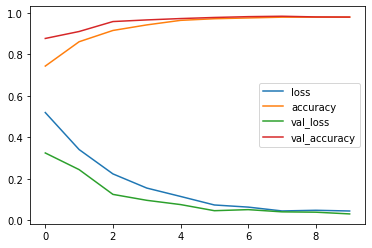

In [49]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history1.history).plot()
plt.show()

In [50]:
test_pred1 = model1.predict(vec_test)

102/102 [==============================] - 1s 6ms/step


In [51]:
preds1 = []
for i in test_pred1:
  if i>0.5:
    preds1.append(1)
  else:
    preds1.append(0)

In [52]:
ids = list(df_test['id'])
sub1 = pd.DataFrame(list(zip(ids, preds1)),
               columns =['id', 'target'])

In [53]:
sub1.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1


In [54]:
sub1.to_csv('submission3.csv',index=False)

**<div class="alert alert-danger">Using Pre-Trained BERT model</div>**

In [59]:
!pip install evaluate
from transformers import  AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset, DatasetDict
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer
import evaluate
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 8.3 MB/s eta 0:00:00


In [60]:
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english" # Define which pre-trained model we will be using
classifier = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2) # Get the classifier
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [79]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [80]:
df_tra = df_train.loc[:, ['text','target']]

In [81]:
df_train_train, df_test_test= train_test_split(df_tra, train_size=0.8,stratify=df_tra.target, random_state=42) 

In [85]:
# Convert pandas dataframe into a dictionary with the dataframe values and some extra values such as attenstion mask and input_ids
data = DatasetDict({
    "train": Dataset.from_pandas(df_train_train),
    "test": Dataset.from_pandas(df_test_test)
})

In [86]:
tokenized_datasets = data.map(lambda dataset: tokenizer(dataset['text'], truncation=True), batched=True)
print(tokenized_datasets)

Map:   0%|          | 0/6090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'target', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 6090
    })
    test: Dataset({
        features: ['text', 'target', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1523
    })
})


In [84]:
print(tokenized_datasets['train'][0])

{'id': 1, 'keyword': None, 'location': None, 'text': 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'target': 1, 'input_ids': [101, 2256, 15616, 2024, 1996, 3114, 1997, 2023, 1001, 8372, 2089, 16455, 9641, 2149, 2035, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [87]:
#We want to remove text and __index_level_0__ as they are not needed for our model fine-tuning. 
#Also we will rename "target" to "labels", as Trainer API require the target to be named "labels"
tokenized_datasets = tokenized_datasets.remove_columns(["text", "__index_level_0__"])
tokenized_datasets = tokenized_datasets.rename_column("target", "labels")
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6090
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1523
    })
})


In [88]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

training_args = TrainingArguments('test-trainer', num_train_epochs=1, evaluation_strategy='epoch',
                                 weight_decay=5e-4, save_strategy='no', report_to='none')

# Metric for validation error
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc") # F1 and Accuracy
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Define trainer
trainer = Trainer(
    classifier,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [89]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6090
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 762
  Number of trainable parameters = 66955010
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.486700,0.396003,0.844386,0.809944


***** Running Evaluation *****
  Num examples = 1523
  Batch size = 8




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=762, training_loss=0.4623001579224594, metrics={'train_runtime': 4001.3453, 'train_samples_per_second': 1.522, 'train_steps_per_second': 0.19, 'total_flos': 79337105328648.0, 'train_loss': 0.4623001579224594, 'epoch': 1.0})

In [90]:
# Get the test data

ids = df_test.id # Save ids
df_test = df_test.loc[:,["text"]] # Keep only text

# Turn the DataFrame into appropriate format
test_dataset = Dataset.from_pandas(df_test)
test_dataset = test_dataset.map(lambda dataset: tokenizer(dataset['text'], truncation=True), batched=True)
test_dataset = test_dataset.remove_columns('text')

# Get the prediction
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)

print(preds)


Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

***** Running Prediction *****
  Num examples = 3263
  Batch size = 8


[1 1 1 ... 1 1 1]


In [91]:
submission = pd.DataFrame({"id":ids, "target":preds})
submission.to_csv("submission5.csv", index=False)